### Modelamiento

Librerias

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data_limpieza.csv')
#df = df.head(1000)
#df = df.iloc[50000:]
df

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,Si,Si,Si,A2,61.0,64,49,59,63,295
1,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,Si,Si,Si,A2,61.0,64,49,59,63,295
2,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,Si,A1,54.0,69,55,48,57,285
3,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,Si,A1,54.0,69,55,48,57,285
4,20192,URBANO,N,A,TÉCNICO,NORTE SANTANDER,MIXTO,ÚNICA,VILLA DEL ROSARIO,OFICIAL,...,Si,Si,Si,A-,37.0,45,50,51,47,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119231,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,SABATINA,BUCARAMANGA,NO OFICIAL,...,No,No,No,A-,34.0,55,57,53,57,269
119232,20221,URBANO,N,A,ACADÉMICO,NORTE SANTANDER,MIXTO,SABATINA,CÚCUTA,NO OFICIAL,...,No,No,No,A-,40.0,55,50,56,52,261
119233,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,SABATINA,FLORIDABLANCA,NO OFICIAL,...,Si,No,Si,A-,32.0,34,34,35,38,175
119234,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,TARDE,BUCARAMANGA,NO OFICIAL,...,Si,No,Si,A1,49.0,49,53,50,60,263


In [3]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df
df = pd.read_csv('data_limpieza.csv')

# Crear un diccionario para almacenar los valores únicos de cada columna
unique_values = {}

# Iterar a través de las columnas del DataFrame
for column in df.columns:
    unique_values[column] = df[column].unique()

# Imprimir los valores únicos para cada columna
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(values)
    print()


Columna: PERIODO
[20192 20221 20222 20211 20201 20191]

Columna: COLE_AREA_UBICACION
['URBANO' 'RURAL']

Columna: COLE_BILINGUE
['N' 'S']

Columna: COLE_CALENDARIO
['A' 'B']

Columna: COLE_CARACTER
['TÉCNICO/ACADÉMICO' 'ACADÉMICO' 'TÉCNICO' 'NO APLICA']

Columna: COLE_DEPTO_UBICACION
['SANTANDER' 'NORTE SANTANDER']

Columna: COLE_GENERO
['MIXTO' 'FEMENINO' 'MASCULINO']

Columna: COLE_JORNADA
['MAÑANA' 'ÚNICA' 'TARDE' 'COMPLETA' 'SABATINA' 'NOCHE']

Columna: COLE_MCPIO_UBICACION
['BUCARAMANGA' 'CHARALÁ' 'VILLA DEL ROSARIO' 'FLORIDABLANCA' 'CURITÍ'
 'GIRÓN' 'RIONEGRO' 'LEBRIJA' 'CÚCUTA' 'OCAÃ‘A' 'LABATECA'
 'SAN VICENTE DE CHUCURÍ' 'MÁLAGA' 'SOCORRO' 'TIBÚ' 'ARATOCA'
 'PUERTO PARRA' 'BARRANCABERMEJA' 'CÁCHIRA' 'PIEDECUESTA' 'ZAPATOCA'
 'OIBA' 'PUERTO WILCHES' 'SAN ANDRÃ‰S' 'ÁBREGO' 'BOLÍVAR' 'LA ESPERANZA'
 'PÁRAMO' 'BARICHARA' 'EL TARRA' 'SILOS' 'PAMPLONA' 'RAGONVALIA'
 'SANTA BÁRBARA' 'TEORAMA' 'LOS PATIOS' 'CHINÁCOTA' 'TOLEDO' 'PINCHOTE'
 'AGUADA' 'SAN GIL' 'PUENTE NACIONAL' 'GÜEPSA' 

In [3]:
df.columns
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

PERIODO                        0
COLE_AREA_UBICACION            0
COLE_BILINGUE                  0
COLE_CALENDARIO                0
COLE_CARACTER                  0
COLE_DEPTO_UBICACION           0
COLE_GENERO                    0
COLE_JORNADA                   0
COLE_MCPIO_UBICACION           0
COLE_NATURALEZA                0
COLE_NOMBRE_ESTABLECIMIENTO    0
COLE_NOMBRE_SEDE               0
ESTU_GENERO                    0
ESTU_PRIVADO_LIBERTAD          0
FAMI_CUARTOSHOGAR              0
FAMI_EDUCACIONMADRE            0
FAMI_EDUCACIONPADRE            0
FAMI_ESTRATOVIVIENDA           0
FAMI_PERSONASHOGAR             0
FAMI_TIENEAUTOMOVIL            0
FAMI_TIENECOMPUTADOR           0
FAMI_TIENEINTERNET             0
FAMI_TIENELAVADORA             0
DESEMP_INGLES                  1
PUNT_INGLES                    1
PUNT_MATEMATICAS               0
PUNT_SOCIALES_CIUDADANAS       0
PUNT_C_NATURALES               0
PUNT_LECTURA_CRITICA           0
PUNT_GLOBAL                    0
dtype: int

Variables

In [4]:
# Variable de respuesta (última columna)
y = df['PUNT_GLOBAL']

# Variables de entrada (solo las columnas especificadas)
columnas_X = ['PERIODO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
       'COLE_CARACTER', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA',
       'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'ESTU_GENERO',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE',
       'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET',
       'FAMI_TIENELAVADORA']#, 'DESEMP_INGLES', 'PUNT_INGLES','PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA'

X= df[columnas_X]
X

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,...,ESTU_PRIVADO_LIBERTAD,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA
50000,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,NORTE SANTANDER,MIXTO,MAÑANA,OCAÃ‘A,OFICIAL,...,N,Dos,Postgrado,Educación profesional completa,Estrato 2,3 a 4,No,Si,Si,Si
50001,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,COMPLETA,CONFINES,OFICIAL,...,N,Dos,Primaria incompleta,Primaria incompleta,Estrato 2,5 a 6,No,No,No,No
50002,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,COMPLETA,CONFINES,OFICIAL,...,N,Dos,Primaria incompleta,Primaria incompleta,Estrato 2,5 a 6,No,No,No,No
50003,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,N,Tres,Secundaria completa,Educación profesional completa,Estrato 3,3 a 4,No,Si,Si,Si
50004,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,N,Tres,Secundaria completa,Educación profesional completa,Estrato 3,3 a 4,No,Si,Si,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119231,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,SABATINA,BUCARAMANGA,NO OFICIAL,...,N,Dos,Primaria incompleta,Secundaria completa,Sin Estrato,3 a 4,No,No,No,No
119232,20221,URBANO,N,A,ACADÉMICO,NORTE SANTANDER,MIXTO,SABATINA,CÚCUTA,NO OFICIAL,...,N,Tres,Primaria incompleta,Ninguno,Estrato 1,5 a 6,No,No,No,No
119233,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,SABATINA,FLORIDABLANCA,NO OFICIAL,...,N,Dos,Educación profesional incompleta,Secundaria incompleta,Estrato 2,1 a 2,Si,Si,No,Si
119234,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,TARDE,BUCARAMANGA,NO OFICIAL,...,N,Dos,Técnica o tecnológica completa,Secundaria incompleta,Estrato 2,3 a 4,No,Si,No,Si


In [5]:
X_enco = pd.get_dummies(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_enco, y, test_size=0.2, random_state=42)

In [7]:
import numpy as np

# Convertir los datos de entrenamiento a arrays NumPy y asegurarse de que los tipos sean numéricos
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
import mlflow
import mlflow.tensorflow

# Suponiendo que tienes tu DataFrame 'df' cargado
# Cargar los datos

# Variables de entrada (todas menos 'PUNT_GLOBAL')
X = df.drop(columns=['PUNT_GLOBAL'])
# Variable de salida
y = df['PUNT_GLOBAL']

# Columnas categóricas y numéricas
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()

# Preprocesamiento: OneHotEncoding para variables categóricas, escalado para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocesar los datos
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Convertir y_train y y_test a números flotantes
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Construir el modelo
def build_model(activation, neurons, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neurons, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neurons // 2, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1)
    ])

def build_and_train_model(optimizer, activation, neurons):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activation, neurons, input_shape)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_absolute_error", "mean_absolute_percentage_error"])
    history = model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))#,verbose=0)
    return history


learning_rate = 0.001

# Lista de optimizadores con learning rate 
optimizadores = {
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
    'Adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
    'FTRL': tf.keras.optimizers.Ftrl(learning_rate=learning_rate)
}

# Configurar experimento en MLflow
#mlflow.set_experiment("Predicción Desempeño Saber 11")

# Entrenar el modelo y registrar con MLflow
#histories = {}
#for name, optimizer in optimizadores.items():
#    with mlflow.start_run(run_name=name):
#        mlflow.tensorflow.autolog()
#        histories[name] = build_and_train_model(optimizer, "relu", 64)
#        mlflow.log_param("optimizer", name)
#        mlflow.log_param("activation", "relu")
#        mlflow.log_param("neurons", 64)

# Para visualizar los experimentos, ejecuta en la terminal:
# mlflow ui

# Entrenar el modelo y guardar historiales
histories = {}
for name, optimizer in optimizadores.items():
    #Para escoger optimizador, mantuvimos linear y 64 neuronas en la primera capa
    histories[name] = build_and_train_model(optimizer,"linear",16)





Epoch 1/4


1731/1731 [==============================] - 6s 2ms/step - loss: 66166.5000 - mean_absolute_error: 252.3335 - mean_absolute_percentage_error: 94.5261 - val_loss: 59522.5625 - val_mean_absolute_error: 239.3161 - val_mean_absolute_percentage_error: 89.7563
Epoch 2/4
1731/1731 [==============================] - 4s 2ms/step - loss: 53607.3555 - mean_absolute_error: 226.8509 - mean_absolute_percentage_error: 84.8825 - val_loss: 47426.3203 - val_mean_absolute_error: 213.3506 - val_mean_absolute_percentage_error: 79.9134
Epoch 3/4
1731/1731 [==============================] - 4s 2ms/step - loss: 41983.7461 - mean_absolute_error: 200.4177 - mean_absolute_percentage_error: 74.8763 - val_loss: 36435.1797 - val_mean_absolute_error: 186.6831 - val_mean_absolute_percentage_error: 69.8061
Epoch 4/4
1731/1731 [==============================] - 4s 2ms/step - loss: 31695.2129 - mean_absolute_error: 173.7570 - mean_absolute_percentage_error: 64.7909 - val_loss: 26967.2383 - val_mean_absolute

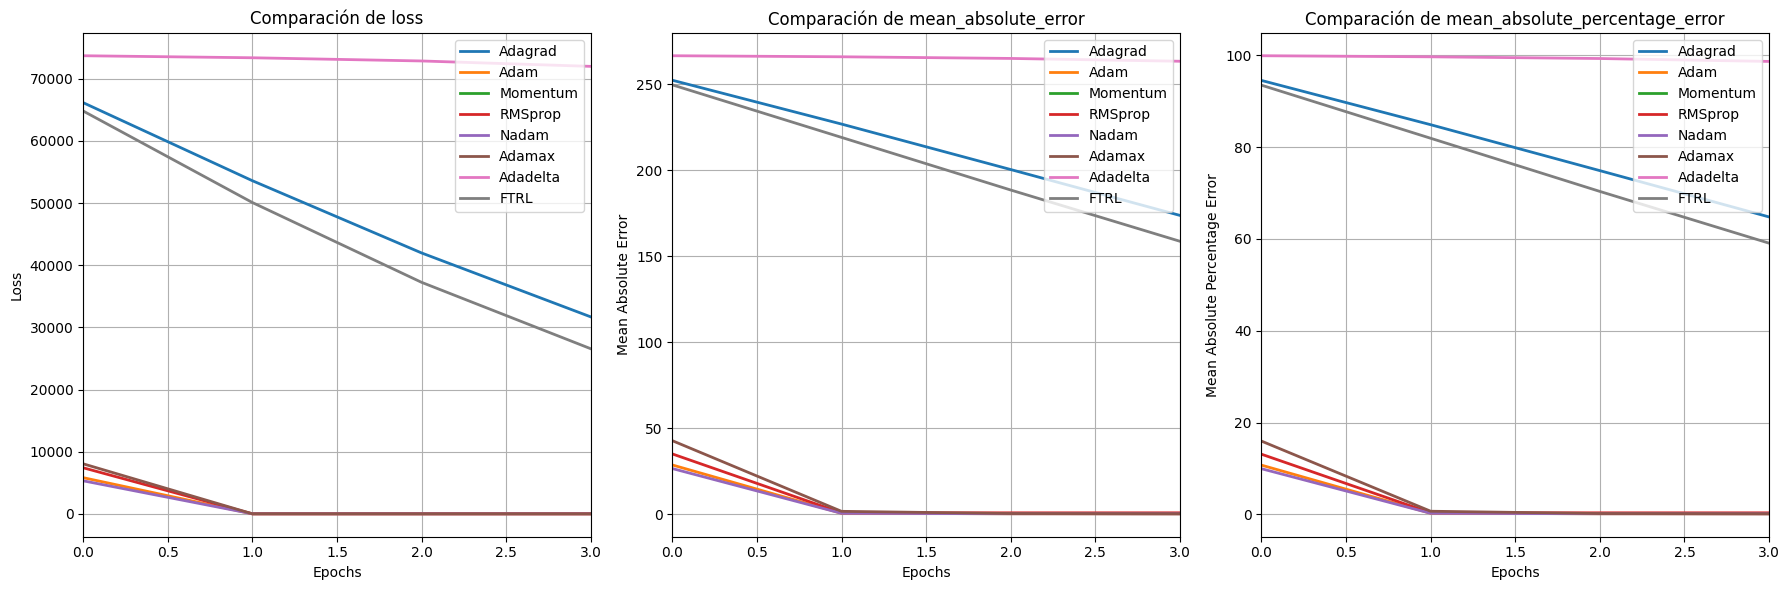

In [9]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Métricas a graficar
metrics = ["loss","mean_absolute_error", "mean_absolute_percentage_error"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
plt.show()


In [10]:
activaciones = {
    'ReLU': 'relu',
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
    'ELU': 'elu',
    'SELU': 'selu',
    'Mish': 'mish',
    'Linear': 'linear'
}

In [11]:
# Entrenar el modelo y guardar historiales
histories = {}
for name, act in activaciones.items():
    #Para escoger optimizador, mantuvimos relu y 64 neuronas en la primera capa
    histories[name] = build_and_train_model(tf.keras.optimizers.Adam(learning_rate=0.001),act,64)

Epoch 1/4
1731/1731 [==============================] - 7s 3ms/step - loss: 4105.6606 - mean_absolute_error: 19.7336 - mean_absolute_percentage_error: 7.3722 - val_loss: 0.4226 - val_mean_absolute_error: 0.4800 - val_mean_absolute_percentage_error: 0.1869
Epoch 2/4
1731/1731 [==============================] - 5s 3ms/step - loss: 0.1830 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 0.1277 - val_loss: 0.1149 - val_mean_absolute_error: 0.2757 - val_mean_absolute_percentage_error: 0.1078
Epoch 3/4
1731/1731 [==============================] - 5s 3ms/step - loss: 0.1180 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 0.1094 - val_loss: 0.1345 - val_mean_absolute_error: 0.2962 - val_mean_absolute_percentage_error: 0.1162
Epoch 4/4
1731/1731 [==============================] - 5s 3ms/step - loss: 0.1540 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 0.1222 - val_loss: 0.1824 - val_mean_absolute_error: 0.3375 - val_mean_absolute_percentage_error:

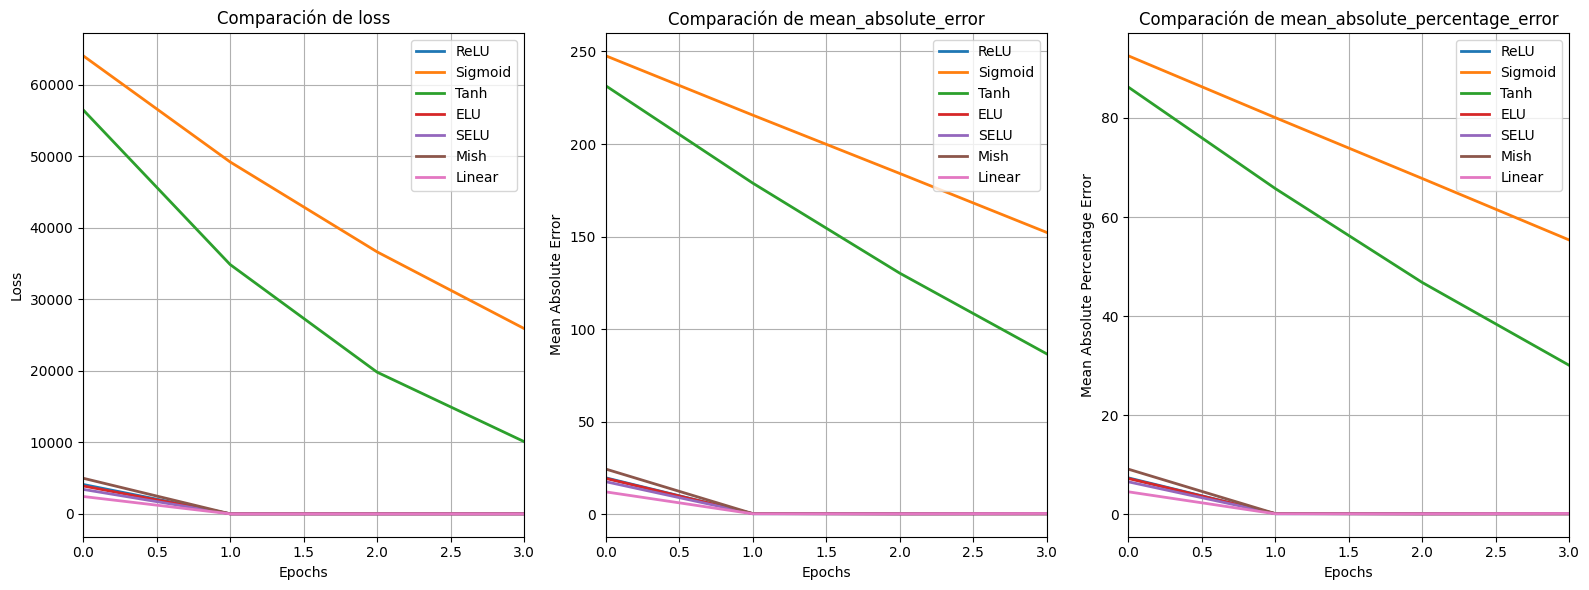

In [12]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss","mean_absolute_error", "mean_absolute_percentage_error"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
plt.show()

Iteracion sobre neuronas

In [13]:
num_neurons_list = [2 ** i for i in range(3, 9)]
num_neurons_list

[8, 16, 32, 64, 128, 256]

In [14]:
histories = {}
for neuronas in num_neurons_list:
    combinacion = f"{neuronas} neuronas"
    histories[combinacion] = build_and_train_model(tf.keras.optimizers.Adam(learning_rate=0.001),'linear',neuronas)

Epoch 1/4
1731/1731 [==============================] - 5s 2ms/step - loss: 8458.8496 - mean_absolute_error: 41.8726 - mean_absolute_percentage_error: 15.6458 - val_loss: 6.1873 - val_mean_absolute_error: 1.9376 - val_mean_absolute_percentage_error: 0.7561
Epoch 2/4
1731/1731 [==============================] - 4s 2ms/step - loss: 2.1322 - mean_absolute_error: 1.0572 - mean_absolute_percentage_error: 0.4115 - val_loss: 0.5743 - val_mean_absolute_error: 0.5711 - val_mean_absolute_percentage_error: 0.2223
Epoch 3/4
1731/1731 [==============================] - 4s 2ms/step - loss: 0.2943 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 0.1597 - val_loss: 0.1745 - val_mean_absolute_error: 0.3255 - val_mean_absolute_percentage_error: 0.1273
Epoch 4/4
1731/1731 [==============================] - 4s 2ms/step - loss: 0.1334 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 0.1132 - val_loss: 0.1138 - val_mean_absolute_error: 0.2752 - val_mean_absolute_percentage_error

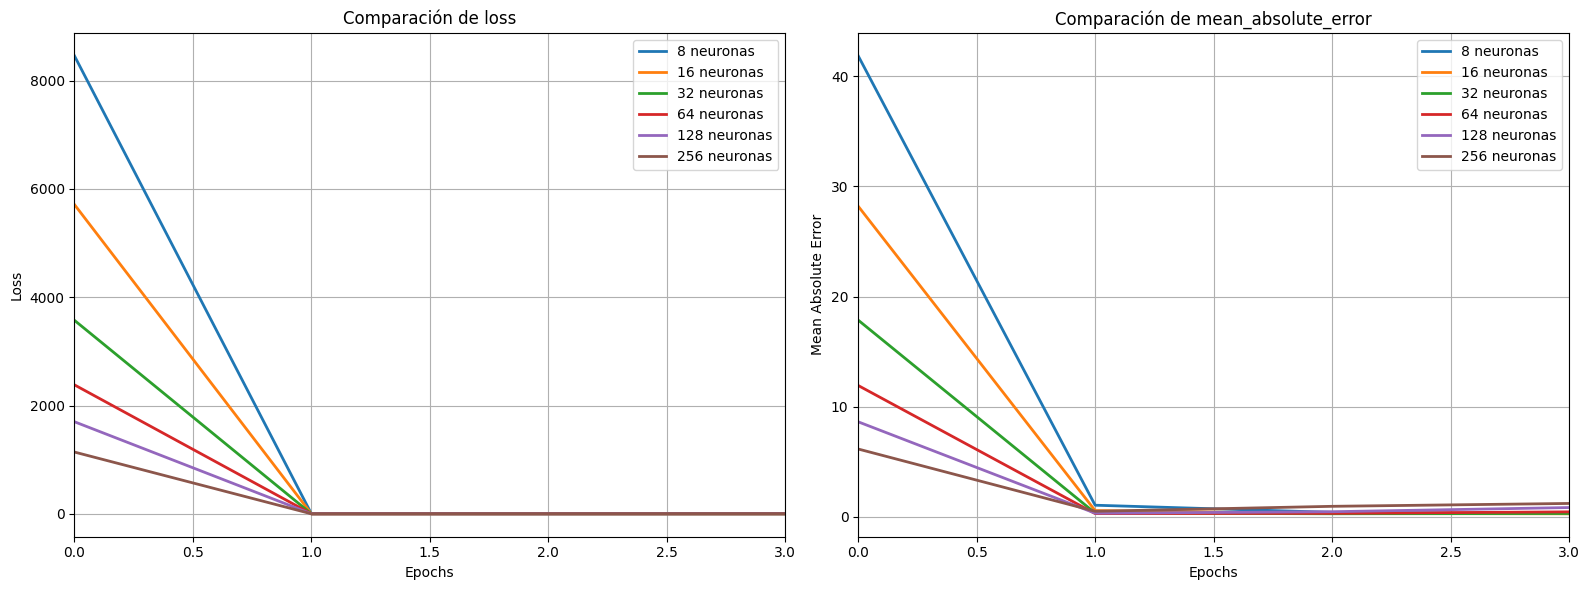

In [15]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "mean_absolute_error"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
plt.show()

Modelo Final preliminar

In [16]:
def build_model(activation, neurons, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neurons, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neurons // 2, activation=activation, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1)
    ])

def build_and_train_model(optimizer, activation, neurons):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activation, neurons, input_shape)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_absolute_error", "mean_absolute_percentage_error"])
    return model, model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

In [17]:
#Corro el modelo final

# Optimizer, activation, and neurons settings
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
activacion = 'linear'
neuronas = 64

# Entrenar el modelo y obtener el historial
retorno=build_and_train_model(optimizer,activacion,neuronas)
model=retorno[0]
history_final = retorno[1]

Epoch 1/15
1731/1731 [==============================] - 6s 3ms/step - loss: 2491.0908 - mean_absolute_error: 12.5249 - mean_absolute_percentage_error: 4.6954 - val_loss: 0.2130 - val_mean_absolute_error: 0.3568 - val_mean_absolute_percentage_error: 0.1393
Epoch 2/15
1731/1731 [==============================] - 5s 3ms/step - loss: 0.1508 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 0.1185 - val_loss: 0.1354 - val_mean_absolute_error: 0.2897 - val_mean_absolute_percentage_error: 0.1133
Epoch 3/15
1731/1731 [==============================] - 5s 3ms/step - loss: 0.1645 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 0.1221 - val_loss: 0.2024 - val_mean_absolute_error: 0.3422 - val_mean_absolute_percentage_error: 0.1345
Epoch 4/15
1731/1731 [==============================] - 5s 3ms/step - loss: 0.3390 - mean_absolute_error: 0.4345 - mean_absolute_percentage_error: 0.1703 - val_loss: 0.6774 - val_mean_absolute_error: 0.6284 - val_mean_absolute_percentage_er

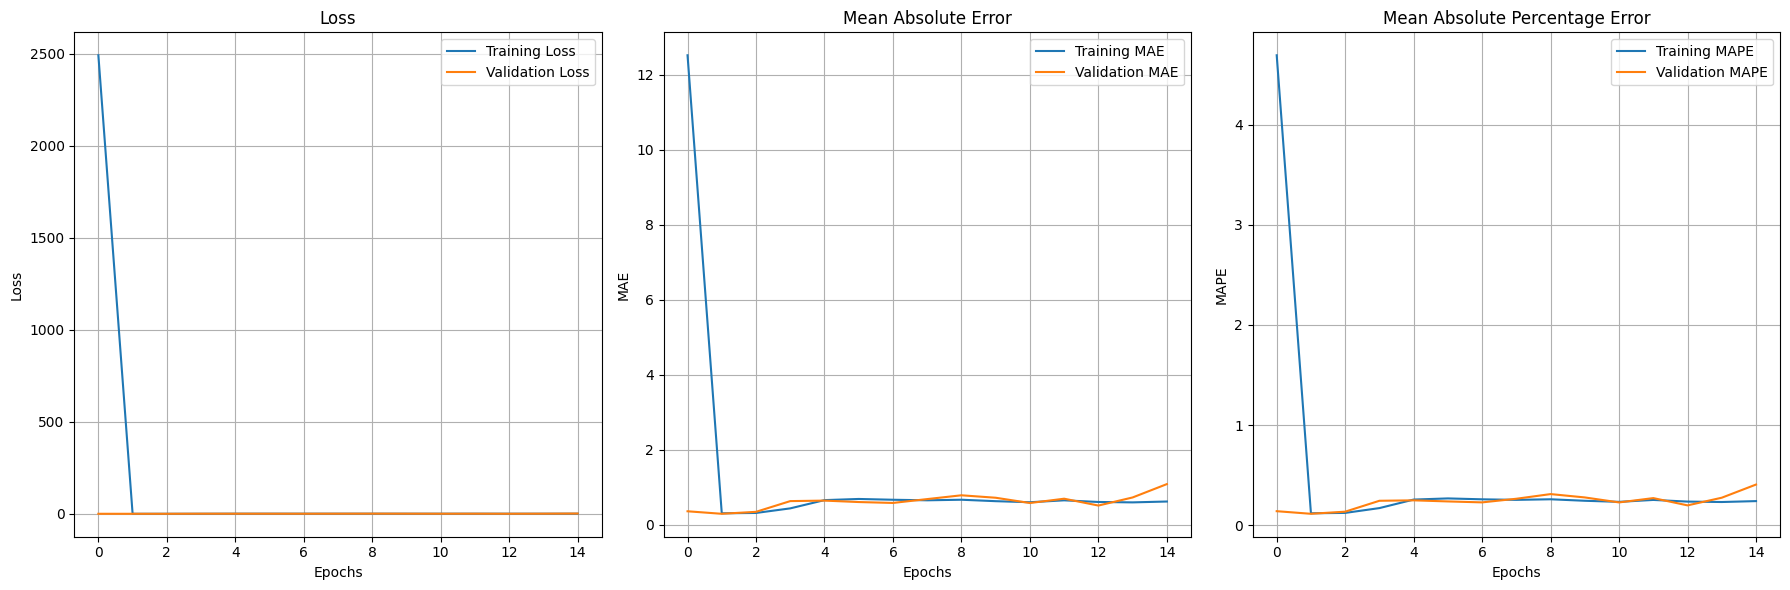

In [18]:
import matplotlib.pyplot as plt

def plot_results(history):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas para graficar todas las métricas

    # Graficar pérdida (loss)
    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid()

    # Graficar Mean Absolute Error (MAE)
    axs[1].plot(history.history['mean_absolute_error'], label='Training MAE')
    axs[1].plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    axs[1].set_title('Mean Absolute Error')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('MAE')
    axs[1].legend()
    axs[1].grid()

    # Graficar Mean Absolute Percentage Error (MAPE)
    axs[2].plot(history.history['mean_absolute_percentage_error'], label='Training MAPE')
    axs[2].plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
    axs[2].set_title('Mean Absolute Percentage Error')
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('MAPE')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_results(history_final)


433/433 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 1.6109557836756563
Root Mean Squared Error (RMSE): 1.2692343296947401
Mean Absolute Error (MAE): 1.0819943928672078
R-squared (R2): 0.9993879228705409


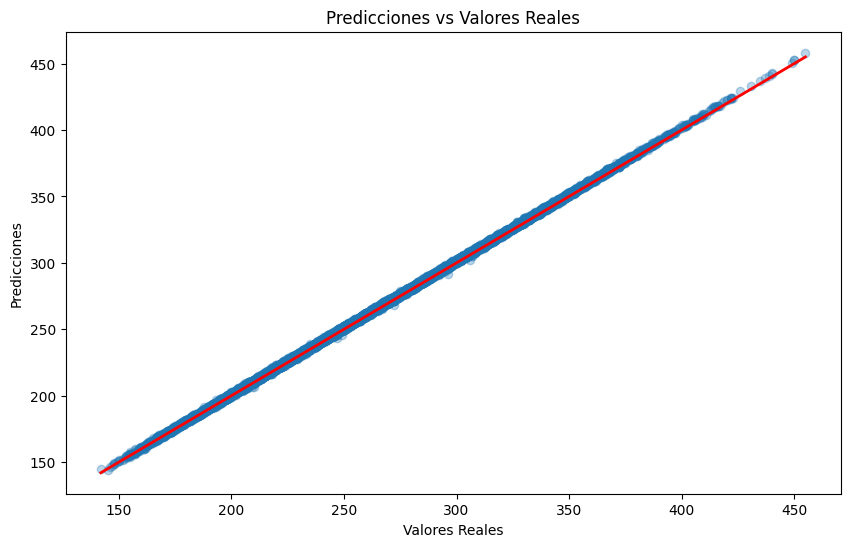

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Probar el modelo
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()